In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
 boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
# delete Unnamed: 0
del boston_df['Unnamed: 0']

In [5]:
# check datatypes
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
# rename columns
boston_df.columns = ['CRIME_RATE', 'RESIDENTIAL_LAND_ZONED', 'PROP_NON_RETAIL_BUSINESS', 'CHAS', 'NITRIC_OXIDES_CONCENTRATION', 'AVERAGE_NO_ROOMS', 'AGE', 'WEIGHTED_DISTANCE', 
                    'RADIAL_HIGHWAYS_INDEX', 'TAX', 'RATIO_BY_TOWN', 'LOWER_STATUS_PERCENTAGE', 'MEDIAN_VALUE_HOMES']

In [7]:
boston_df.head()

,CRIME_RATE,RESIDENTIAL_LAND_ZONED,PROP_NON_RETAIL_BUSINESS,CHAS,NITRIC_OXIDES_CONCENTRATION,AVERAGE_NO_ROOMS,AGE,WEIGHTED_DISTANCE,RADIAL_HIGHWAYS_INDEX,TAX,RATIO_BY_TOWN,LOWER_STATUS_PERCENTAGE,MEDIAN_VALUE_HOMES
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
# check for missing values
boston_df.isna().sum()

CRIME_RATE                     0
RESIDENTIAL_LAND_ZONED         0
PROP_NON_RETAIL_BUSINESS       0
CHAS                           0
NITRIC_OXIDES_CONCENTRATION    0
AVERAGE_NO_ROOMS               0
AGE                            0
WEIGHTED_DISTANCE              0
RADIAL_HIGHWAYS_INDEX          0
TAX                            0
RATIO_BY_TOWN                  0
LOWER_STATUS_PERCENTAGE        0
MEDIAN_VALUE_HOMES             0
dtype: int64

In [9]:
#check for duplicates
boston_df.duplicated().sum()

0

<h1> Task 4: Generate Descriptive Statistics and Visualizations </h1>
<h3>For all visualizations, please include a title in each graph and appropriate labels</h3>

**Generate the following and explain your findings:**

1.  For the "Median value of owner-occupied homes" provide a boxplot

2.  Provide a  bar plot for the Charles river variable

3.  Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

4.  Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

5.  Create a histogram for the pupil to teacher ratio variable

#### Boxplot: Median value of owner-occupied homes

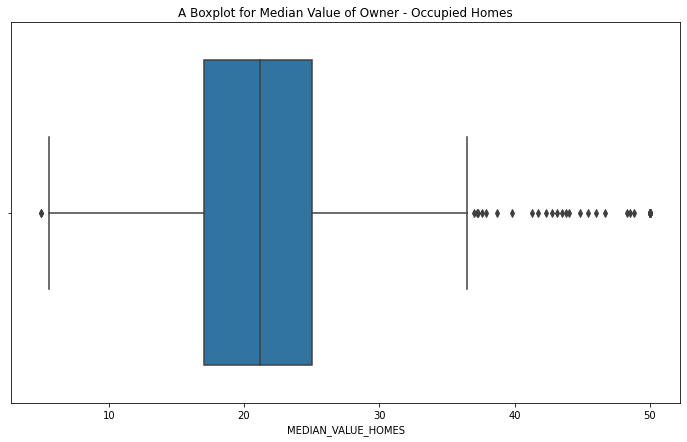

In [10]:
fig = plt.figure(figsize = (12, 7))
fig = sns.boxplot(data = boston_df, x='MEDIAN_VALUE_HOMES', orient = 'h')
plt.title('A Boxplot for Median Value of Owner - Occupied Homes');

#### Bar Plot: for the Charles river variable

In [11]:
boston_df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

Text(0.5, 1.0, 'A Bar plot for Charles river variable')

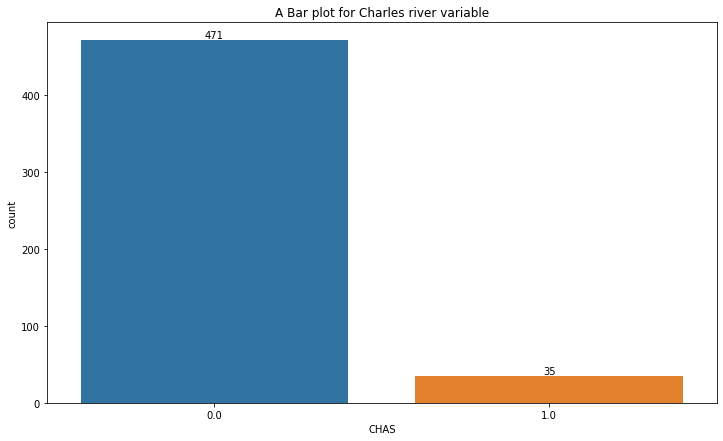

In [12]:
fig = plt.figure(figsize = (12, 7))
fig = sns.countplot(x=boston_df['CHAS'])
fig.bar_label(fig.containers[0])
plt.title('A Bar plot for Charles river variable')
# plt.xlabel(None);

#### Provide a boxplot for the MEDV variable vs the AGE variable. 

In [13]:
boston_df['AGE_Range'] = pd.cut(boston_df['AGE'],
                                  [0, 35, 70, np.inf],
                                  labels = ['Young - 35', '35-70', '70 and Above'])

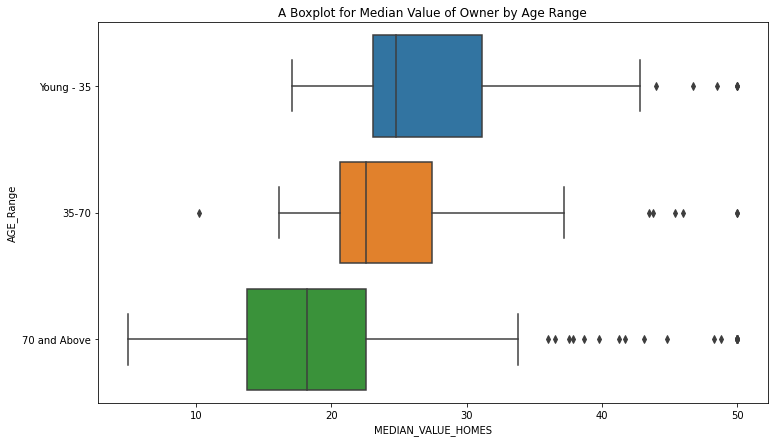

In [14]:
fig = plt.figure(figsize = (12, 7))
fig = sns.boxplot(data = boston_df, x='MEDIAN_VALUE_HOMES', y='AGE_Range', orient = 'h')
plt.title('A Boxplot for Median Value of Owner by Age Range');

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

In [15]:
boston_df.columns

Index(['CRIME_RATE', 'RESIDENTIAL_LAND_ZONED', 'PROP_NON_RETAIL_BUSINESS',
       'CHAS', 'NITRIC_OXIDES_CONCENTRATION', 'AVERAGE_NO_ROOMS', 'AGE',
       'WEIGHTED_DISTANCE', 'RADIAL_HIGHWAYS_INDEX', 'TAX', 'RATIO_BY_TOWN',
       'LOWER_STATUS_PERCENTAGE', 'MEDIAN_VALUE_HOMES', 'AGE_Range'],
      dtype='object')

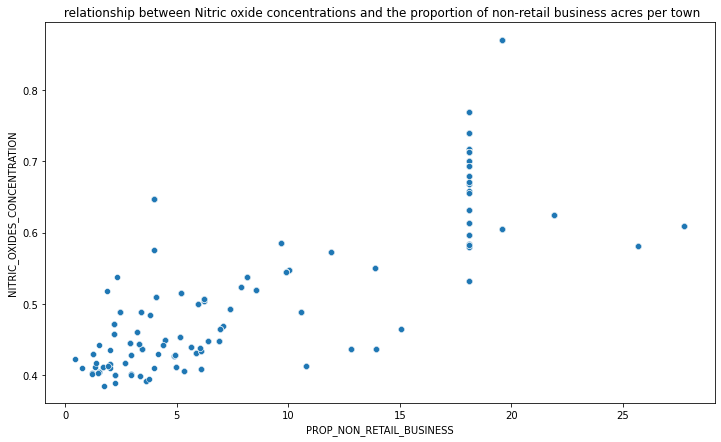

In [16]:
fig = plt.figure(figsize = (12, 7))
fig = sns.scatterplot(y='NITRIC_OXIDES_CONCENTRATION', x='PROP_NON_RETAIL_BUSINESS', data=boston_df)
plt.title(' relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town');

-  There is a Linear Relationship between Nitric Oxides Concentration with the proportion of non-retail business
-  As the number of the proportion of non-retail business increases, the concentration of Nitric Oxides also increases.

#### Create a histogram for the pupil to teacher ratio variable

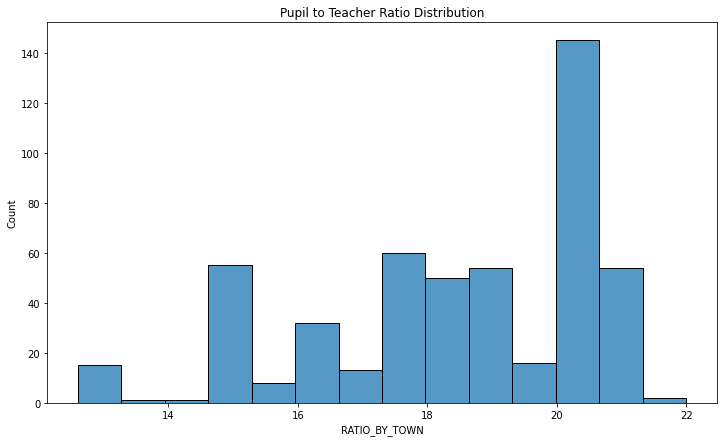

In [17]:
fig = plt.figure(figsize = (12, 7))
fig = sns.histplot(data = boston_df, x = 'RATIO_BY_TOWN')
plt.title('Pupil to Teacher Ratio Distribution');

<h1>Task 5: Use the appropriate tests to answer the questions provided.</h1>
<h3>For each of the following questions;</h3>

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

-  State your hypothesis.

-  Use α = 0.05

-  Perform the test Statistics.

-  State the conclusion from the test.

In [18]:
boston_df.columns

Index(['CRIME_RATE', 'RESIDENTIAL_LAND_ZONED', 'PROP_NON_RETAIL_BUSINESS',
       'CHAS', 'NITRIC_OXIDES_CONCENTRATION', 'AVERAGE_NO_ROOMS', 'AGE',
       'WEIGHTED_DISTANCE', 'RADIAL_HIGHWAYS_INDEX', 'TAX', 'RATIO_BY_TOWN',
       'LOWER_STATUS_PERCENTAGE', 'MEDIAN_VALUE_HOMES', 'AGE_Range'],
      dtype='object')

### Question 5.1

#### T - Test: Is there a significant difference in median value of houses bounded by the Charles river or not?

ASSUMPTIONS -

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-  One independent, categorical variable with two levels or group
-  One dependent continuous variable
-  Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-  The dependent variable must follow a normal distribution (Bell - shaped distribution)
-  Homogeneity of variance

State the hypothesis

-  H0:µ1=µ2  ("there is no difference in median value of houses bounded by the Charles river")
-  H1:µ1≠µ2  ("there is a difference in median value of houses bounded by the Charles river")
-  alpha level = 0.05

In [19]:
# Use the ttest_ind from the scipy_stats library
scipy.stats.ttest_ind(boston_df['MEDIAN_VALUE_HOMES'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

CONCLUSION: The p-value is less than alpha value 0.05, therefore, we reject the null hypothesis as there is enough proof that there is a statistical difference in in median value of houses bounded by the Charles river

### Question 5.2

#### ANOVA: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

ANOVA can't work with continuous variable. So, lets group the age data into categories. The grouping has already been done. The groups in AGE_RANGE column are as follows:

-  Younger to 35
-  Between 35 and 70 years
-  70 years and older

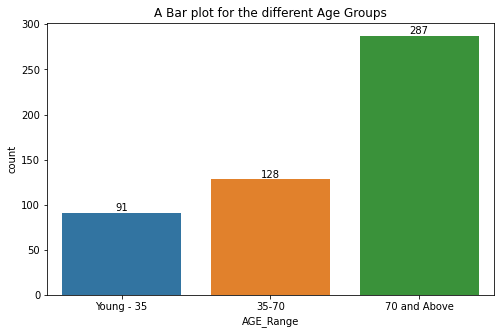

In [29]:

fig = plt.figure(figsize = (8, 5))
fig = sns.countplot(data = boston_df, x = 'AGE_Range')
fig.bar_label(fig.containers[0])
plt.title('A Bar plot for the different Age Groups');

State the hypothesis

-  H0:µ1=µ2=µ3  (the three population means are equal)
-  H1:  At least one of the means differ

**Use the One - Way ANOVA**

In [21]:
boston_df['AGE_Range'].unique()

['35-70', '70 and Above', 'Young - 35']
Categories (3, object): ['Young - 35' < '35-70' < '70 and Above']

In [22]:
thirtyfive_lower = boston_df[boston_df['AGE_Range'] == 'Young - 35']['MEDIAN_VALUE_HOMES']
thirtyfive_seventy = boston_df[boston_df['AGE_Range'] == '35-70']['MEDIAN_VALUE_HOMES']
seventy_older = boston_df[boston_df['AGE_Range'] == '70 and Above']['MEDIAN_VALUE_HOMES']

In [23]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print('F_Statistic: {}, \nP-Value: {}'.format(f_statistic, p_value))

F_Statistic: 36.40764999196599, 
P-Value: 1.7105011022702984e-15


CONCLUSION:
-  The P-Value is less than the alpha value 0.05.
-  Therefore, we reject the null Hypothesis, as there is significant evidence that at least one of the Median values differ.

### Question 5.3

#### Pearson Correlation: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

State the hypothesis:

-  H0:  There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
-  H1:  There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Since these 2 variables are contineous variables, we will use Pearson Correlation Test

In [24]:
boston_df.columns

Index(['CRIME_RATE', 'RESIDENTIAL_LAND_ZONED', 'PROP_NON_RETAIL_BUSINESS',
       'CHAS', 'NITRIC_OXIDES_CONCENTRATION', 'AVERAGE_NO_ROOMS', 'AGE',
       'WEIGHTED_DISTANCE', 'RADIAL_HIGHWAYS_INDEX', 'TAX', 'RATIO_BY_TOWN',
       'LOWER_STATUS_PERCENTAGE', 'MEDIAN_VALUE_HOMES', 'AGE_Range'],
      dtype='object')

In [25]:
f_statistic, p_value = scipy.stats.pearsonr(boston_df['NITRIC_OXIDES_CONCENTRATION'], boston_df['PROP_NON_RETAIL_BUSINESS'])
print('Pearson Coefficient: {}, \nP-Value: {}'.format(f_statistic, p_value))

Pearson Coefficient: 0.7636514469209157, 
P-Value: 7.913361061233745e-98


CONCLUSION:
-  The P-Value is less than the alpha value 0.05.
-  Therefore, we reject the null Hypothesis, and conclude that there is a relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.
-  Furthermore, the Pearson Coefficient is Positive = 0.76 and closer to 1. Therefore, this means that there is a strong positive relationship between the two aforementioned variables.

### Question 5.4

####  Regression analysis: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

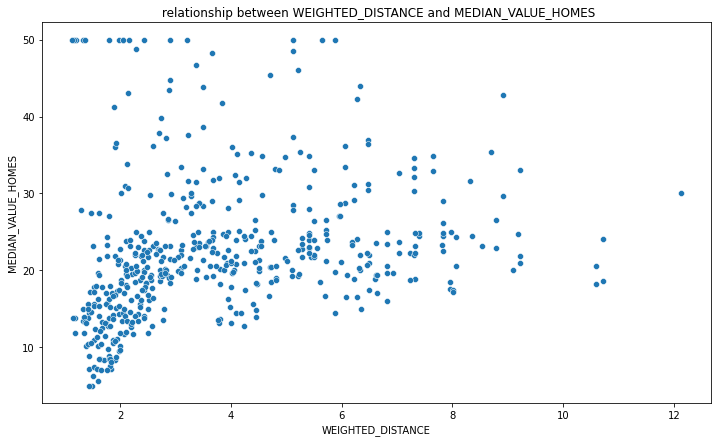

In [26]:
fig = plt.figure(figsize = (12, 7))
fig = sns.scatterplot(y='MEDIAN_VALUE_HOMES', x='WEIGHTED_DISTANCE', data=boston_df)
plt.title(' relationship between WEIGHTED_DISTANCE and MEDIAN_VALUE_HOMES');

We will state the null hypothesis:

-  H0:β1  = 0 (There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)
-  H1:β1  is not equal to 0 (There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

In [27]:
import statsmodels.api as sm
# X is the input variables (or independent variables)
X = boston_df['WEIGHTED_DISTANCE']

# y is the target/dependent variable
y = boston_df['MEDIAN_VALUE_HOMES']

## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     MEDIAN_VALUE_HOMES   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           1.21e-08
Time:                        00:43:18   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                18.3901      0.817     22.499      0.000      16.784      19.996
WEIGHTED_DISTANCE     1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CONCLUSION: 
-  The p-values is = 1.21e-08
-  The p-value is less than the alpha (α) level = 0.05,
-  So we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. 

In [28]:
# R-squared: Pearson R - Coefficient
r_squared = 0.062
pearsonR = np.sqrt(r_squared)
print(round(pearsonR,2))

0.25


-  The Pearson Coefficient is 0.25, which indicates a positive but poor relationship between the two aforementioned investigated variables.